In [176]:
from sklearn import tree
from sklearn.tree import export_graphviz

clf = tree.DecisionTreeClassifier()

# CHALLENGE - create 3 more classifiers...
# 1
# 2
# 3

# [height, weight, shoe_size]
X = [[181, 80, 44], [177, 70, 43], [160, 60, 38], [154, 54, 37], [166, 65, 40],
     [190, 90, 47], [175, 64, 39], [177, 70, 40], [159, 55, 37], [171, 75, 42], [181, 85, 43]]

Y = [['male', 'male', 'female', 'female', 'male', 'male', 'female', 'female',
     'female', 'male', 'male']]

#data = pd.merge(X, Y)

# CHALLENGE - ...and train them on our data
#clf = clf.fit(X, Y)

#prediction = clf.predict([[190, 70, 43]])

# CHALLENGE compare their reusults and print the best one!

#print(prediction)
print(np.array(X),np.array(Y))
np.concatenate((np.array(X),np.array(Y).T),axis=1)

[[181  80  44]
 [177  70  43]
 [160  60  38]
 [154  54  37]
 [166  65  40]
 [190  90  47]
 [175  64  39]
 [177  70  40]
 [159  55  37]
 [171  75  42]
 [181  85  43]] [['male' 'male' 'female' 'female' 'male' 'male' 'female' 'female' 'female'
  'male' 'male']]


array([['181', '80', '44', 'male'],
       ['177', '70', '43', 'male'],
       ['160', '60', '38', 'female'],
       ['154', '54', '37', 'female'],
       ['166', '65', '40', 'male'],
       ['190', '90', '47', 'male'],
       ['175', '64', '39', 'female'],
       ['177', '70', '40', 'female'],
       ['159', '55', '37', 'female'],
       ['171', '75', '42', 'male'],
       ['181', '85', '43', 'male']], 
      dtype='<U11')

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Original data from Siraj Raval:
#X = [[181, 80, 44], [177, 70, 43], [160, 60, 38], [154, 54, 37], [166, 65, 40], [190, 90, 47], [175, 64, 39], [177, 70, 40], [159, 55, 37], [171, 75, 42], [181, 85, 43]]
#Y = ['male', 'male', 'female', 'female', 'male', 'male', 'female', 'female', 'female', 'male', 'male']

accList = []

# load data from Howell1.csv (https://github.com/rmcelreath/rethinking/tree/master/data)
data = pd.read_csv('Howell1.csv', sep=';')

# devide data to train and test in 60/40 proportion
X = data.drop('male', axis=1)
y = data.loc[:,'male']

# loop for comparison prediction in table accList
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)
    # define classifieres, train and score
    clf1 = DecisionTreeClassifier()
    clf1 = clf1.fit(X_train,y_train)
    acc1 = clf1.score(X_test, y_test) 

    clf2 = GaussianNB()
    clf2 = clf2.fit(X_train,y_train)
    acc2 = clf2.score(X_test, y_test) 

    clf3 = KNeighborsClassifier()
    clf3 = clf3.fit(X_train,y_train)
    acc3 = clf3.score(X_test, y_test) 
    
    clf4 = SVC()
    clf4 = clf4.fit(X_train,y_train)
    acc4 = clf4.score(X_test, y_test) 
    
    clf5 = Perceptron()
    clf5 = clf5.fit(X_train,y_train)
    acc5 = clf5.score(X_test, y_test) 

    # make predictions for given example of height 190 cm, weight 70 kg, and age 43 years
    prediction1 = clf1.predict([[190,70,43]])#[0]
    prediction2 = clf2.predict([[190,70,43]])#[0]
    prediction3 = clf3.predict([[190,70,43]])#[0]
    prediction4 = clf4.predict([[190,70,43]])#[0]
    prediction5 = clf5.predict([[190,70,43]])#[0]
    
    # compere results on test data
    accList += [[acc1,acc2,acc3,acc4,acc5,prediction1,prediction2,prediction3,prediction4,prediction5]]

#print(pd.DataFrame(accList, columns=['TreeScore','GaussianNBScore','KNeighborsScore','prediction1','prediction2','prediction3']).head())

# final comparison of scores of three classifiers
print(pd.DataFrame(accList,columns=['TreeScore','GaussianNBScore','KNeighborsScore','SVC','Perceptron','prediction1','prediction2','prediction3','prediction4','prediction5']).describe())

# The best classifier from 1-5
accMean1 = pd.DataFrame(accList).mean()[0]
accMean2 = pd.DataFrame(accList).mean()[1]
accMean3 = pd.DataFrame(accList).mean()[2]
accMean4 = pd.DataFrame(accList).mean()[3]
accMean5 = pd.DataFrame(accList).mean()[4]

index = np.argmax([accMean1, accMean2, accMean3, accMean4, accMean5])
classifiers = {0: 'TreeScore', 1: 'GaussianNBScore', 2: 'KNeighborsScore', 3: 'SVC', 4: 'Perceptron'}
print('Best gender classifier is {}'.format(classifiers[index]))

C:\Users\PNaF\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


        TreeScore  GaussianNBScore  KNeighborsScore           SVC  \
count  100.000000       100.000000     1.000000e+02  1.000000e+02   
mean     0.716330         0.651376     7.201835e-01  6.055046e-01   
std      0.011325         0.000000     4.463264e-16  4.463264e-16   
min      0.692661         0.651376     7.201835e-01  6.055046e-01   
25%      0.711009         0.651376     7.201835e-01  6.055046e-01   
50%      0.715596         0.651376     7.201835e-01  6.055046e-01   
75%      0.724771         0.651376     7.201835e-01  6.055046e-01   
max      0.738532         0.651376     7.201835e-01  6.055046e-01   

         Perceptron  
count  1.000000e+02  
mean   4.770642e-01  
std    1.673724e-16  
min    4.770642e-01  
25%    4.770642e-01  
50%    4.770642e-01  
75%    4.770642e-01  
max    4.770642e-01  
Best gender classifier is KNeighborsScore


In [11]:
from sklearn import tree
import pandas as pd
import numpy as np

data2 = pd.read_csv('SexAgeHW.csv', sep=';')
data2.head()

X2 = data2.drop('sex', axis=1)
Y2 = data2.loc[:,'sex']

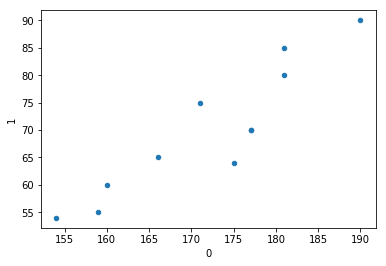

,0,1,2
0,181,80,44
1,177,70,43
2,160,60,38
3,154,54,37
4,166,65,40


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

data = pd.DataFrame(X)
data.plot.scatter(x=0,y=1)
pd2 = data.head()
pd1 = plt.show()
#display(pd1)
display(pd2)

In [16]:
data.head()

,0,1,2
0,181,80,44
1,177,70,43
2,160,60,38
3,154,54,37
4,166,65,40


In [21]:
data = pd.DataFrame(data)

In [22]:
data.index

RangeIndex(start=0, stop=11, step=1)

In [23]:
data.describe()

,0,1,2
count,11.000000,11.000000,11.000000
mean,171.909091,69.818182,40.909091
std,11.040422,11.796764,3.176619
min,154.000000,54.000000,37.000000
25%,163.000000,62.000000,38.500000
50%,175.000000,70.000000,40.000000
75%,179.000000,77.500000,43.000000
max,190.000000,90.000000,47.000000


In [47]:
data = pd.DataFrame(X, columns = ['wzrost', 'waga', 'rozmiarButa'])

In [74]:
data = data.assign(wzrostStand = lambda x: (data['wzrost']-data['wzrost'].mean())/data['wzrost'].std())
data = data.assign(wzrostNorm = lambda x: (data['wzrost']-data['wzrost'].min())/(data['wzrost'].max()-data['wzrost'].min()))
data.head()

,wzrost,waga,rozmiarButa,col,wzrostNorm,wzrostStand
0,181,80,44,1,0.750000,0.823420
1,177,70,43,1,0.638889,0.461115
2,160,60,38,1,0.166667,-1.078681
3,154,54,37,1,0.000000,-1.622138
4,166,65,40,1,0.333333,-0.535223


In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

scalerStand = StandardScaler().fit(data['wzrost'].values.reshape(-1,1))
scalerNorm = Normalizer().fit(data['wzrost'].values.reshape(1,-1))
standarized_wzrost = pd.DataFrame(scalerStand.transform(data['wzrost'].values.reshape(-1,1)))
normalized_wzrost = pd.DataFrame(scalerNorm.transform(data['wzrost'].values.reshape(1,-1)).T)
print(standarized_wzrost)
print(normalized_wzrost)
data = data.assign(standarized = standarized_wzrost)
data = data.assign(normalized = normalized_wzrost)
data.head()

           0
0   0.863611
1   0.483622
2  -1.131330
3  -1.701313
4  -0.561347
5   1.718585
6   0.293628
7   0.483622
8  -1.226327
9  -0.086361
10  0.863611
           0
0   0.316862
1   0.309860
2   0.280099
3   0.269596
4   0.290603
5   0.332618
6   0.306359
7   0.309860
8   0.278349
9   0.299356
10  0.316862


C:\Users\PNaF\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Users\PNaF\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


,wzrost,waga,rozmiarButa,col,wzrostNorm,wzrostStand,standarized,normalized
0,181,80,44,1,0.750000,0.823420,0.863611,0.316862
1,177,70,43,1,0.638889,0.461115,0.483622,0.309860
2,160,60,38,1,0.166667,-1.078681,-1.131330,0.280099
3,154,54,37,1,0.000000,-1.622138,-1.701313,0.269596
4,166,65,40,1,0.333333,-0.535223,-0.561347,0.290603


In [100]:
#print(data['wzrost'].reshape(-1,1))
#print(data['wzrost'].reshape(1,-1))
print(data['wzrost'].values.reshape(-1,1))
print(data['wzrost'].values.reshape(1,-1))

[[181]
 [177]
 [160]
 [154]
 [166]
 [190]
 [175]
 [177]
 [159]
 [171]
 [181]]
[[181 177 160 154 166 190 175 177 159 171 181]]


In [134]:
from sklearn import preprocessing

XScale = preprocessing.scale(X)
print(XScale)

XscalerStand = preprocessing.StandardScaler().fit(X)
print(XscalerStand, XscalerStand.mean_, XscalerStand.scale_)
XStand = XscalerStand.transform(X)
print(XStand)

XscalerMinMax = preprocessing.MinMaxScaler().fit(X)
print(XscalerMinMax)
XMinMax = XscalerMinMax.transform(X)
print(XMinMax)

XscalerNorm = preprocessing.Normalizer(norm='l1').fit(X)
print(XscalerNorm)
XNorm = XscalerNorm.transform(X)
print(XNorm)

[[ 0.86361067  0.9052297   1.02051038]
 [ 0.48362198  0.01616482  0.69034526]
 [-1.13132998 -0.87290007 -0.96048036]
 [-1.70131302 -1.406339   -1.29064548]
 [-0.56134694 -0.42836763 -0.30015011]
 [ 1.71858523  1.79429459  2.01100575]
 [ 0.29362763 -0.51727412 -0.63031524]
 [ 0.48362198  0.01616482 -0.30015011]
 [-1.22632715 -1.31743251 -1.29064548]
 [-0.08636107  0.46069726  0.36018014]
 [ 0.86361067  1.34976215  0.69034526]]
StandardScaler(copy=True, with_mean=True, with_std=True) [ 171.90909091   69.81818182   40.90909091] [ 10.52662896  11.24777297   3.0287875 ]
[[ 0.86361067  0.9052297   1.02051038]
 [ 0.48362198  0.01616482  0.69034526]
 [-1.13132998 -0.87290007 -0.96048036]
 [-1.70131302 -1.406339   -1.29064548]
 [-0.56134694 -0.42836763 -0.30015011]
 [ 1.71858523  1.79429459  2.01100575]
 [ 0.29362763 -0.51727412 -0.63031524]
 [ 0.48362198  0.01616482 -0.30015011]
 [-1.22632715 -1.31743251 -1.29064548]
 [-0.08636107  0.46069726  0.36018014]
 [ 0.86361067  1.34976215  0.69034526]

C:\Users\PNaF\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


In [159]:
list(XMinMax[:11,:1].T)

[array([ 0.75      ,  0.63888889,  0.16666667,  0.        ,  0.33333333,
         1.        ,  0.58333333,  0.63888889,  0.13888889,  0.47222222,
         0.75      ])]

In [140]:
XMinMax[2]

array([ 0.16666667,  0.16666667,  0.1       ])